### CNN FREQUENCY

In [1]:
import preprocessor.frequency_preprocessor as preprocessor
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.preprocess(True, True, True)

In [2]:
print(X_train.shape)

(2672, 18, 641)


Load CNN model

In [3]:
from ia.cnn.frequency_cnn import FrequencyCNN
frequency_cnn = FrequencyCNN(input_shape=(X_train[0].shape))

In [4]:
frequency_cnn.compile()

In [5]:
NR_EPOCHS = 100
BATCH_SIZE = 250

In [ ]:
frequency_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

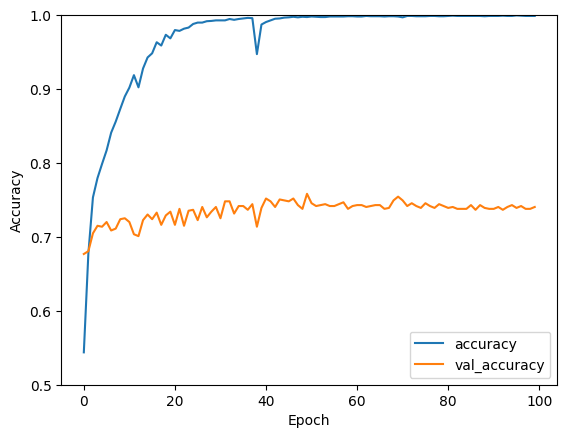

In [7]:
frequency_cnn.plot_train_val()

In [8]:
frequency_cnn.predict(X_test)
frequency_cnn.print_predictions(y_test)

7/7 [==============================] - 0s 4ms/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: Fal

### METRICS:

In [9]:
from metrics.metrics import Metrics
metrics = Metrics(y_test, frequency_cnn.predictions, frequency_cnn.name(), "frequency")
metrics.all_metrics()
metrics.metrics_to_database()

True Positives: 84
True Negatives: 96
False Positives: 26
False Negatives: 14
total Samples: 220
Accuracy: 0.8181818181818182
Precision: 0.7636363636363637
Sensitivity: 0.8571428571428571
Specificity: 0.7868852459016393
TPR: 0.7636363636363637
FPR: 0.21311475409836064
F1-Score: 0.8372093023255814


ROC curve

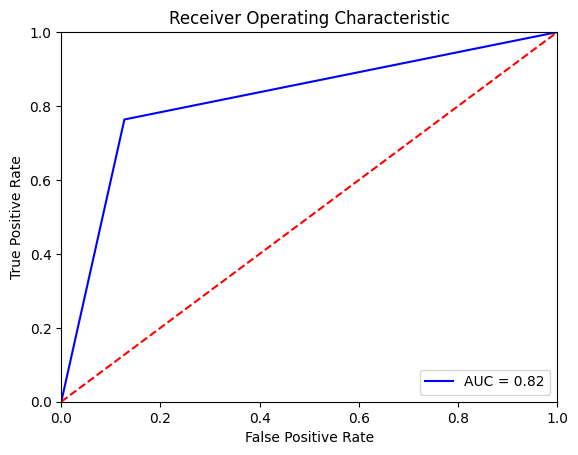

In [10]:
metrics.plot_roc_auc(y_test, frequency_cnn.predictions)